## 개념
* 각 개체의 유사성을 측정하여 유사성이 높은 대상집단을 분류하는 기법
* 요인분석과 차이: 군집분석이 군집의 특징을 파악하는데 목적이 있다면, 요인분석은 데이터의 유사한 변수를 묶어 다중공선성을 줄이는데 목적
* 비지도 학습
* 이상치 탐색 용도로 사용 됨.

### 요인분석 간단히 알아보기
* 변수간의 상관관계를 분석하여, 공통차원을 통해 축약하는 통계기법
* 다수 변수의 정보 손실을 최소화 하면서 소수의 요인으로 축약

In [19]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.datasets import load_wine
import warnings
warnings.filterwarnings('ignore')
load = load_wine()
x =pd.DataFrame(load['data'],columns = load['feature_names'])
y= load['target']

from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
sc_x =pd.DataFrame(ss.fit_transform(x),columns = x.columns)
sc_x


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [20]:
from sklearn.decomposition import FactorAnalysis
best_dim  = 4
model  = FactorAnalysis(best_dim)
fa_result =  model.fit_transform(sc_x)
pd.DataFrame(fa_result)
# 나머지는 요인 분석 공부시 완벽하게 ... ㅠㅠㅠ

,0,1,2,3
0,1.240491,-0.252644,-0.603267,-0.365849
1,0.826900,0.845627,-0.883508,-0.828541
2,1.249403,-0.912297,0.061351,0.001315
3,1.735172,-0.923585,-1.410143,0.260708
4,0.693603,-1.291211,1.175444,-0.075086
...,...,...,...,...
173,-1.342375,-0.886220,-0.790419,0.081276
174,-1.180647,-0.894623,-0.484280,0.127724
175,-1.317754,-0.640514,-1.721705,0.540811
176,-1.250006,-0.800353,-1.284993,0.151534


In [21]:
!pip install factor_analyzer

In [22]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer

# 샘플 데이터 생성
np.random.seed(0)
data = pd.DataFrame({
    'x1': np.random.normal(size=100),
    'x2': np.random.normal(size=100),
    'x3': np.random.normal(size=100),
    'x4': np.random.normal(size=100)
})

# 데이터 스케일링
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# PCA 수행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
print("PCA 주성분 점수:\n", pca_result)
print("PCA 설명된 분산 비율:", pca.explained_variance_ratio_)

# 요인 분석 수행
fa = FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(data_scaled)
factor_loadings = fa.loadings_
print("요인 적재값:\n", factor_loadings)


PCA 주성분 점수:
 [[ 8.68945667e-01  2.44285641e+00]
 [ 1.78032881e-01 -1.34849178e+00]
 [ 3.83264674e-01  2.97204835e-02]
 [ 1.50374334e+00  1.91876237e+00]
 [ 8.80942133e-01  2.21708303e-01]
 [-4.94370031e-01  2.17421665e-01]
 [-4.62381621e-01  1.27889454e+00]
 [-1.50399678e+00  5.85019092e-01]
 [ 1.56087361e+00 -3.56836537e-01]
 [ 8.70034505e-01  5.59682735e-01]
 [ 1.60348814e+00  2.46613037e-01]
 [ 1.83024180e+00  2.11166304e-01]
 [-1.73079177e-01  7.34935221e-01]
 [ 4.79619583e-01  9.29239470e-01]
 [-6.73573225e-01  4.90878152e-01]
 [ 4.15579034e-01  2.31721710e-01]
 [ 1.10959824e+00  1.08862183e+00]
 [-3.02817121e-03 -2.66527811e-01]
 [ 1.86557690e+00 -2.55147390e-01]
 [ 1.50252991e-01 -5.00255361e-01]
 [-1.65097485e+00 -1.20607012e+00]
 [-8.78892806e-01  6.13867258e-01]
 [ 4.07573321e-01  3.66918613e-01]
 [ 3.41105173e-01  1.09803399e-01]
 [-9.47723191e-01  2.31154869e+00]
 [-6.84147309e-01 -1.05306686e+00]
 [-1.28053052e-01 -2.03411569e-01]
 [ 2.23225275e+00 -1.50191956e+00]
 [ 2.96

### 계층적 군집 분석
* n개의 군집으로 출발해 점차 갯수를 줄여 나가는 방법
* 군집의 거리를 계산하는 방법에 따라 최단,최장, 평균, 중심, 와드연결법으로 구분
* 와드연결법: 데이터의 거리보다는 군집내 편차의 재곱합에 근거를 두고 군집화
  - 데이터 크기가 너무크지 않으면 사용
  - 군집내 편차는 작고, 군집간 편차는 크게 군집화 시키는 것이 최적화
  - 계산량이 많음.
  - 군집크기를 비슷하게 만들어 해석력이 좋다
    
* 함수 및 주요 파라미터
  - 함수: linkage
      - method: single, complete(최장),average, centroid,ward
      - metric: eculidean.....
 
  - 함수: dendrgram 
  - 함수: fcluster 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

US= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/USArrests.csv")
US

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [25]:
# Unnamed: 0	Murder	Assault	UrbanPop	Rap
# US.columns[0] =['State']
US =US.rename(columns={'Unnamed: 0': 'State'})
lable_list =US['State'].to_list()
US

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [26]:
single = linkage(US.iloc[:,1::],metric ='euclidean',method='single') 
ward = linkage(US.iloc[:,1::],metric ='euclidean',method='ward') 

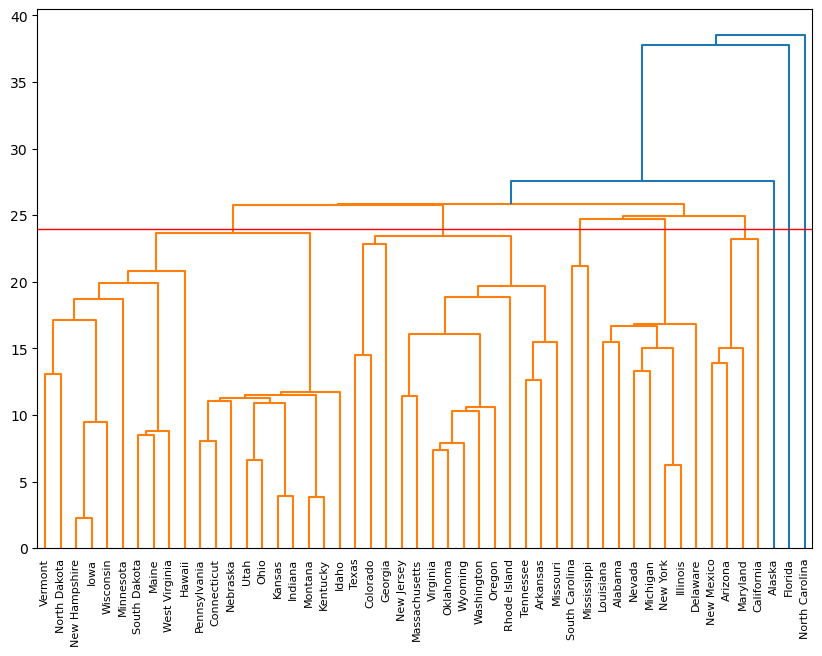

In [27]:
plt.figure(figsize=(10,7))
dendrogram(single,
           orientation ='top',
           labels = lable_list ,
           distance_sort ='descending',
           color_threshold = 27,
           show_leaf_counts= True)
plt.axhline(y=24,color='r',linewidth=1)
#오른쪽 3개 군집은 1개의 객체만 존재

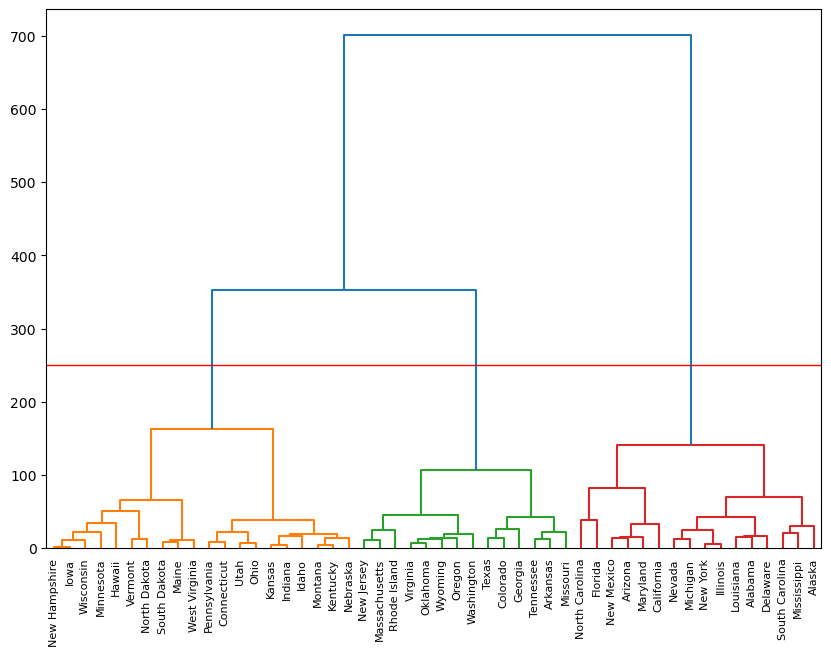

In [76]:
plt.figure(figsize=(10,7))
dendrogram(ward,
           orientation ='top',
           labels = lable_list ,
           distance_sort ='descending',
           color_threshold = 250,
           show_leaf_counts= True)
plt.axhline(y=250,color='r',linewidth=1)

In [78]:
assignments = fcluster(ward,250,'distance')
US['cluster'] = assignments
US

,State,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,2


In [80]:
US
# US.groupby('cluster')[].mean()
US.groupby('cluster')[['Murder','Assault','UrbanPop','Rape']].mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


In [82]:
assignments = fcluster(single,23,'distance')
US['cluster'] = assignments
assignments

array([ 3,  9,  1,  5,  2,  6,  7,  3, 10,  6,  8,  7,  3,  7,  8,  7,  7,
        3,  8,  1,  5,  3,  8,  4,  5,  7,  7,  3,  8,  5,  1,  3, 11,  8,
        7,  5,  5,  7,  5,  4,  8,  5,  6,  7,  8,  5,  5,  8,  8,  5],
      dtype=int32)

In [32]:
US
# US.groupby('cluster')[].mean()
US.groupby('cluster')[['Murder','Assault','UrbanPop','Rape']].mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,10.266667,293.000000,72.333333,30.300000
2,9.000000,276.000000,91.000000,40.600000
3,11.471429,247.571429,74.285714,27.200000
4,15.250000,269.000000,46.000000,19.800000
5,7.000000,164.545455,70.090909,20.890909
6,12.666667,205.333333,72.666667,30.000000
7,5.590000,112.400000,65.600000,17.270000
8,2.950000,62.700000,53.900000,11.510000
9,10.000000,263.000000,48.000000,44.500000


### 비계층적 군집 분석
* 램덤하게 군집을 묶어가는 방법
* K-means, DBSCAN,혼합분포 군집분석
* K-means
  - 속성의 갯수가 적은 단순한 대이터에 활용.
  - K개의 클러스터로 군집화하며, 각 클러스터와 거리차이의 분산을 최소화하는 방식
  - 1)초기값 설정 -> 2)클러스터 설정 -> 3)클러스터 중심 재조정. 2),3)반복
  - 쉽고 간결, 변수가 많은 경우 성능 저하 -> PCA해서변수 축소, K을 결정해야 함
  - 군집 갯수 판단하는 방법 : 콜린스키하라바츠, 엘보우(SSE가 급격히줄어드는 부분이 적절한 갯수)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
# warnings.filterwarnings('ignore')

iris= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv")

In [3]:
x= iris.drop('target',axis=1)

In [5]:
from sklearn.metrics import calinski_harabasz_score
for k in range(2,10):
  kmeans_model = KMeans(n_clusters=k,random_state=1).fit(x)
  labels = kmeans_model.labels_
  print(k,calinski_harabasz_score(x,labels))

C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

2 513.3038433517568
3 560.3660038653594
4 527.8352837316515
5 402.46819347771435


C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


6 430.44943774852953
7 405.190965210156
8 366.98004553740174
9 329.5247040985366


C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

[680.8244, 152.36870647733906, 78.9450658259773, 57.47327326549492, 56.254527090301, 42.695191563275436, 37.82143557312253, 35.6628720893142, 34.5658657009657, 26.9612466993554]


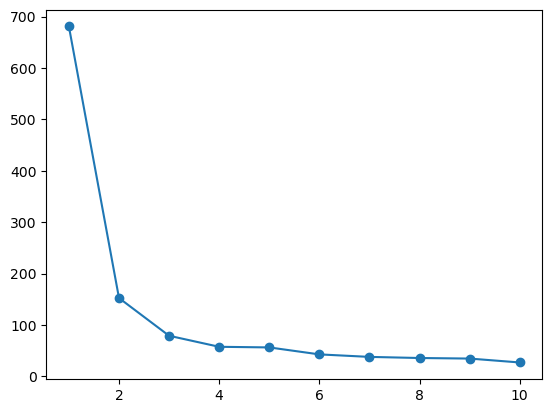

In [7]:
import matplotlib.pyplot as plt
def elbow(x):
  sse = []
  for i in range(1,11):
    km = KMeans(n_clusters =i, random_state = 1)
    km.fit(x)
    sse.append(km.inertia_)

  plt.plot(range(1,11),sse,marker='o')
  print(sse)
elbow(x)

In [9]:
km = KMeans(n_clusters =3, random_state = 1)
km.fit(x)
iris['cluster']=km.labels_
iris


C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length,sepal width,petal length,petal width,target,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [11]:

iris.groupby(['cluster'])[['sepal length','sepal width','petal length','petal width']].mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.883607,2.740984,4.388525,1.434426
1,5.006000,3.418000,1.464000,0.244000
2,6.853846,3.076923,5.715385,2.053846


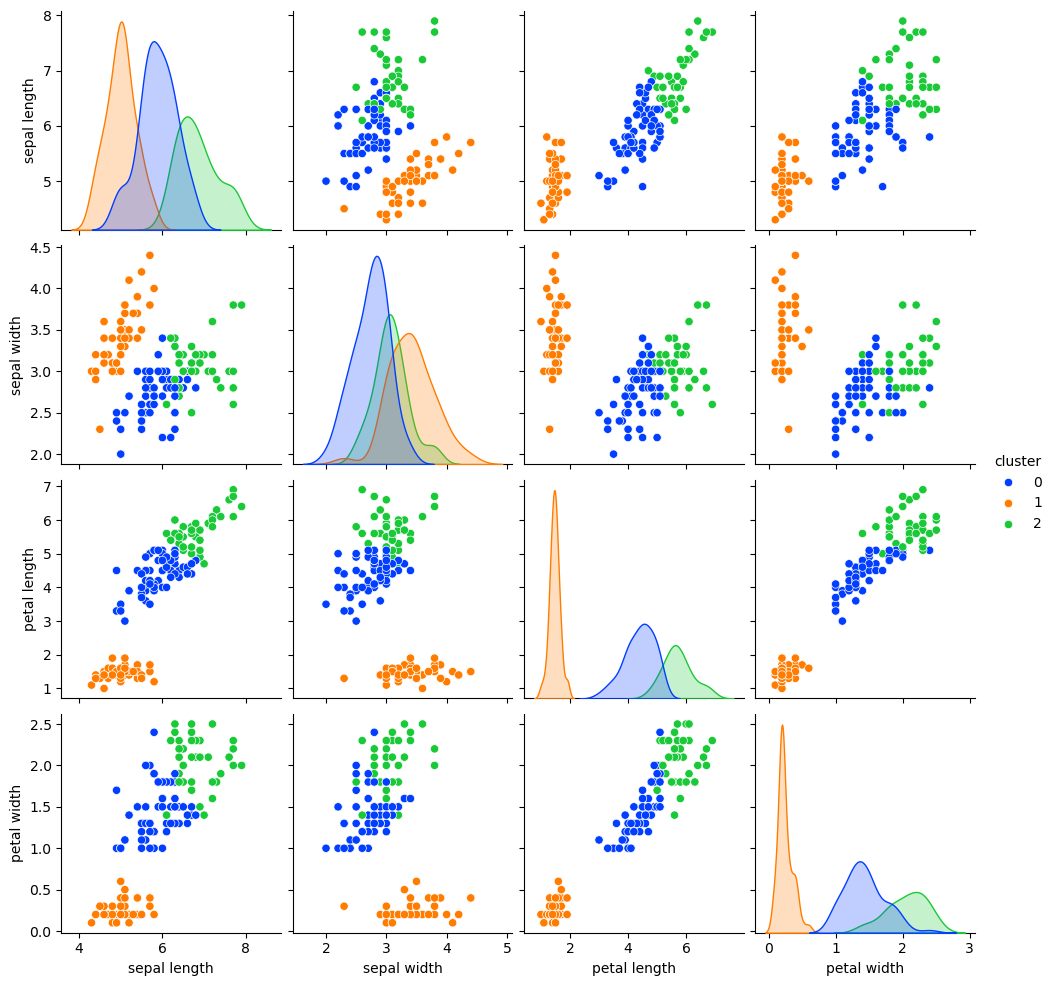

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris.drop('target',axis = 1)
             ,hue ='cluster'
             ,diag_kind ='auto'
             ,corner =False
             ,palette = 'bright'
             )

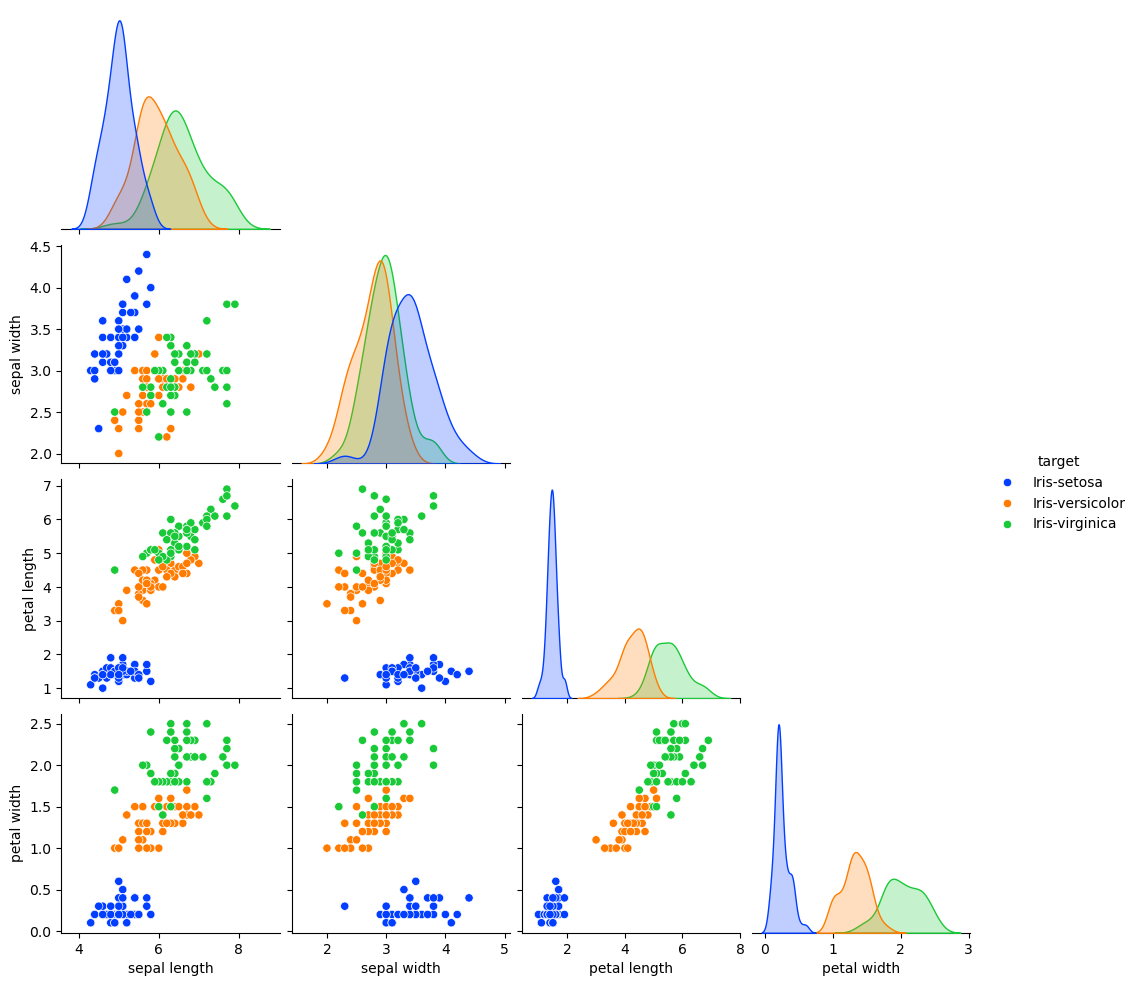

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(iris.drop('cluster',axis=1)
# sns.pairplot(iris
             ,hue ='target'
             ,diag_kind ='kde'
             ,corner =True
             ,palette = 'bright'
             )

### 혼합분포 군집분석
* 모형을 기반으로 한 방법
* 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형에서 나왔다는 가정하에 분석 진행
* 장점
    * K-means보다 통계적으로 엄밀한 결과를 얻을 수 있다.(확률분포 도입)
    * 군집을 몇개의 모수로 표현할 수 있고, 다른 크기나 모양의 군집을 찾을 수 있다.
* 단점
  * 군집의 크기가 너무 작으면 추정의 정도가 떨어짐.
  * 데이터가 커지면 알고리즘 적용시 비용이 증가
  * 이상치에 민감하기 때문에 전처리 필요
  * 정규분포와 차이가 크면 결과가 좋지 못하다.
* 사용 알고리즘: EM
* 가우시안
  * 함수 : GaussianMixture
  * 매개변수: n_components(예상 군집 수), max_iter(EM의 반복횟수) 

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
iris= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/iris.csv")
df = iris.drop('target',axis=1)
ss = StandardScaler()
df_sc =ss.fit_transform(df)

gmm= GaussianMixture(n_components =  3)
gmm.fit(df_sc)
gmm_labels =gmm.predict(df_sc)
df['gmm_cluster']=gmm_labels

C:\Users\jongi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
df.groupby(['gmm_cluster'])[['sepal length','sepal width','petal length','petal width']].mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.006000,3.418000,1.464000,0.244000
1,6.554545,2.950909,5.489091,1.989091
2,5.904444,2.775556,4.193333,1.293333


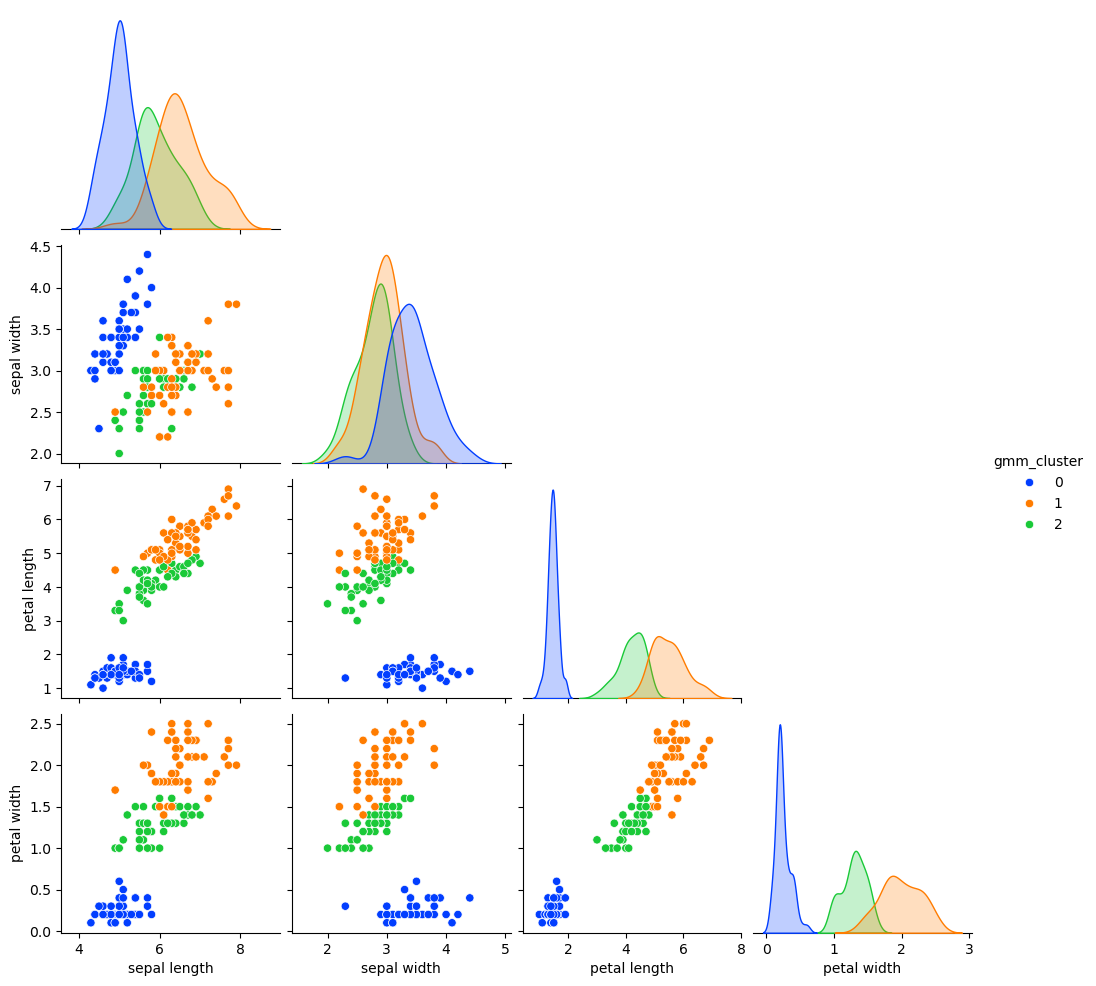

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df
             ,hue ='gmm_cluster'
             ,diag_kind ='kde'
             ,corner =True
             ,palette = 'bright'
             )